In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('canada_per_capita_income.csv')
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [3]:
df.shape


(47, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


In [5]:
df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


Text(0.5, 1.0, 'Scatter Plot of year vs per capita income (US$)')

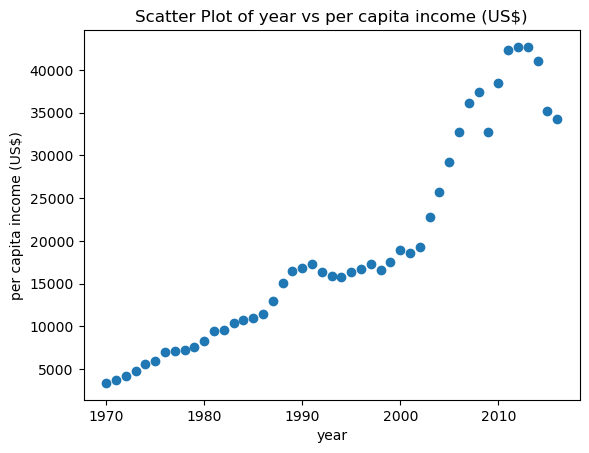

In [8]:
plt.scatter(df.year, df['per capita income (US$)'])
plt.xlabel("year")
plt.ylabel("per capita income (US$)")
plt.title("Scatter Plot of year vs per capita income (US$)")

In [10]:
X = df.drop("year", axis = "columns")
y = df.drop("per capita income (US$)", axis = "columns")

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=4) 

In [12]:
X_train

,per capita income (US$)
22,16412.083090
37,36144.481220
12,9619.438377
42,42665.255970
26,16699.826680
25,16369.317250
44,41039.893600
13,10416.536590
10,8355.968120
19,16426.725480


In [13]:
y_train

,year
22,1992
37,2007
12,1982
42,2012
26,1996
25,1995
44,2014
13,1983
10,1980
19,1989


In [15]:
X_test

,per capita income (US$)
32,19232.175560
45,35175.188980
4,5576.514583
15,11018.955850
38,37446.486090
20,16838.673200
16,11482.891530
7,7100.126170
18,15080.283450
11,9434.390652


In [16]:
y_test

,year
32,2002
45,2015
4,1974
15,1985
38,2008
20,1990
16,1986
7,1977
18,1988
11,1981


In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
lr.coef_

array([[0.00105766]])

In [19]:
lr.intercept_

array([1973.04257207])

In [20]:
lr.predict([[45]])

C:\Users\USR\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1973.09016672]])

In [21]:
y_pred  = lr.predict(X_test)
y_pred

array([[1993.38365476],
       [2010.24592567],
       [1978.94062265],
       [1984.69686939],
       [2012.6481834 ],
       [1990.85214556],
       [1985.18755512],
       [1980.55208409],
       [1988.9923689 ],
       [1983.02093982]])

In [23]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["year", "per capita income (US$)_original","per capita income (US$)_predicted"])

,year,per capita income (US$)_original,per capita income (US$)_predicted
0,19232.175560,2002.0,1993.383655
1,35175.188980,2015.0,2010.245926
2,5576.514583,1974.0,1978.940623
3,11018.955850,1985.0,1984.696869
4,37446.486090,2008.0,2012.648183
5,16838.673200,1990.0,1990.852146
6,11482.891530,1986.0,1985.187555
7,7100.126170,1977.0,1980.552084
8,15080.283450,1988.0,1988.992369
9,9434.390652,1981.0,1983.020940


In [24]:
lr.score(X_test,y_test)

0.9012299493575099

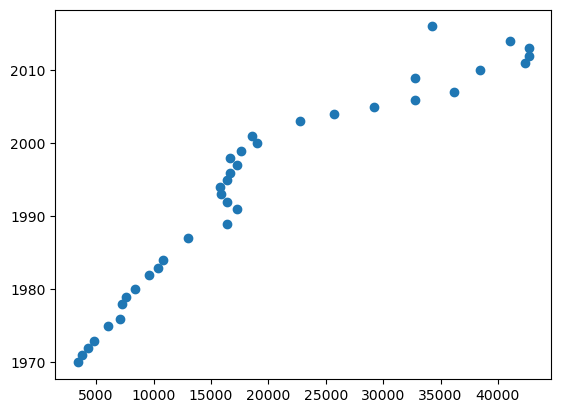

In [25]:
plt.scatter(X_train,y_train)  

In [26]:
lr.predict(X_train)

array([[1990.40095871],
       [2011.27110629],
       [1983.2166572 ],
       [2018.1678621 ],
       [1990.7052933 ],
       [1990.35572704],
       [2016.44878303],
       [1984.05971527],
       [1981.88033657],
       [1990.41644537],
       [1990.62368982],
       [2003.92415713],
       [1991.35145001],
       [1986.76549247],
       [2017.81825847],
       [1997.0931299 ],
       [1984.45505986],
       [1977.53886588],
       [1989.70685646],
       [1992.71650643],
       [1991.63729968],
       [1980.51189857],
       [2018.17972099],
       [2000.24465836],
       [1991.3042149 ],
       [1976.63787113],
       [1978.12405564],
       [2007.66848898],
       [1993.1247471 ],
       [2007.68637814],
       [1981.08386074],
       [1980.7084493 ],
       [1989.83352853],
       [2013.67838214],
       [1977.02814612],
       [1979.38656314],
       [2009.24538522]])

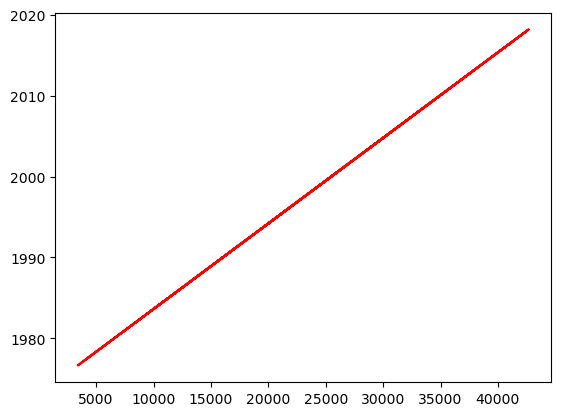

In [27]:
plt.plot(X_train, lr.predict(X_train), 'r-')

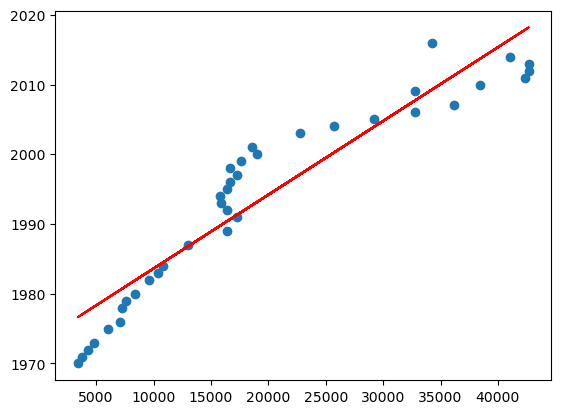

In [28]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color = "r")

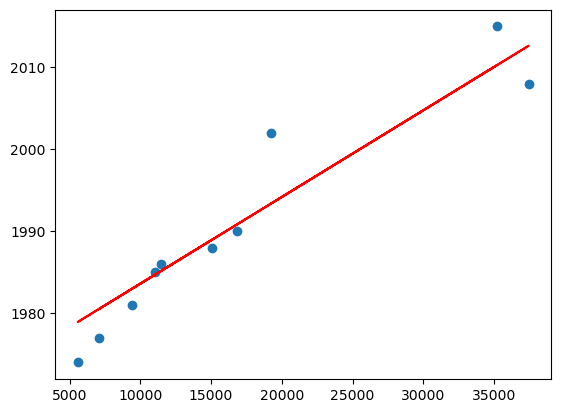

In [29]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lr.predict(X_test), color = "r")

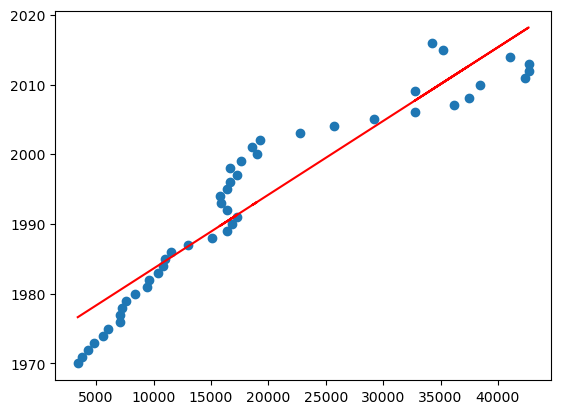

In [30]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X), color = "r")